In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import operator
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import settings

import Stemmer
import statsmodels.api as sm

/Users/owentemple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def read_data():
    df = pd.read_excel(os.path.join('..',settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

In [3]:
df = read_data()

In [4]:
df['norm_persuasive'].describe()

count    2406.000000
mean      137.190942
std       167.388307
min         0.000000
25%        37.566308
50%        90.985507
75%       180.264298
max      2758.625723
Name: norm_persuasive, dtype: float64

In [5]:
persuasive_median = df['norm_persuasive'].median()
persuasive_upper_quantile = df['norm_persuasive'].quantile(.75)

In [6]:
df['persuasive_label'] = np.where(df['persuasive'] >= persuasive_median, 1, 0)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
stemmer = SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

In [8]:
my_additional_stop_words = ['__', '', 'èm', 'ère', 'ès', 'èt', 'ève', 'èâ', 'èé', 'î¾', 'éte']

In [9]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [10]:
count_vect = StemmedCountVectorizer(analyzer="word", stop_words='english', min_df=2, encoding='ISO-8859-1', strip_accents='unicode')
X_train_counts = count_vect.fit_transform(df['transcript'])
X_train_counts.shape

(2406, 20454)

In [11]:
sorted(count_vect.vocabulary_.items(), key=operator.itemgetter(1), reverse=True)

[('zx81', 20453),
 ('zurich', 20452),
 ('zulu', 20451),
 ('zuckerman', 20450),
 ('zuckerberg', 20449),
 ('zuccotti', 20448),
 ('zopa', 20447),
 ('zooplankton', 20446),
 ('zoop', 20445),
 ('zoonot', 20444),
 ('zoom', 20443),
 ('zoolog', 20442),
 ('zoo', 20441),
 ('zone', 20440),
 ('zombi', 20439),
 ('zoe', 20438),
 ('zodiac', 20437),
 ('zipper', 20436),
 ('ziploc', 20435),
 ('ziplin', 20434),
 ('zipcar', 20433),
 ('zip', 20432),
 ('zine', 20431),
 ('zinc', 20430),
 ('zimbardo', 20429),
 ('zimbabwean', 20428),
 ('zimbabw', 20427),
 ('zillion', 20426),
 ('zilch', 20425),
 ('zika', 20424),
 ('zigzag', 20423),
 ('zig', 20422),
 ('zheng', 20421),
 ('zf', 20420),
 ('zeus', 20419),
 ('zeta', 20418),
 ('zesti', 20417),
 ('zeroth', 20416),
 ('zero', 20415),
 ('zeray', 20414),
 ('zeppelin', 20413),
 ('zenith', 20412),
 ('zen', 20411),
 ('zeitgeist', 20410),
 ('zedong', 20409),
 ('zebra', 20408),
 ('zealot', 20407),
 ('zealand', 20406),
 ('zeal', 20405),
 ('ze', 20404),
 ('zarqawi', 20403),
 ('zar

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2406, 20454)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, df['persuasive_label'])

In [15]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

In [16]:
predicted = clf.predict(X_test)
np.mean(predicted == y_test)

0.68106312292358806

In [17]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1,

In [18]:
clf.score(X_test, y_test)

0.68106312292358806

Classification accuracy is 68%

Null accuracy: accuracy that could be achieved by always predicting the most frequent class


In [19]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.5481727574750831

This means that a dumb model that always predicts 0 would be right 56% of the time

This shows how classification accuracy is fairly good as 12% higher than a dumb model
It's a good way to know the minimum we should achieve with our models

In [20]:
from sklearn.model_selection import cross_validate
X = X_train_tfidf
y = df['persuasive_label']
nb = MultinomialNB()

In [22]:
cv_results = cross_validate(nb, X, y, return_train_score=False, cv=10)
sorted(cv_results.keys())                         
['fit_time', 'score_time', 'test_score']
cv_results['test_score']    

array([ 0.6446281 ,  0.66390041,  0.6846473 ,  0.70954357,  0.67219917,
        0.70416667,  0.65416667,  0.6625    ,  0.64166667,  0.6125    ])

In [23]:
cv_results['test_score'].mean()

0.66499185556050888

In [24]:
def standard_confusion_matrix(y_true, y_pred):
    """Make confusion matrix with format:
                  -----------
                  | TP | FP |
                  -----------
                  | FN | TN |
                  -----------
    Parameters
    ----------
    y_true : ndarray - 1D
    y_pred : ndarray - 1D

    Returns
    -------
    ndarray - 2D
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

In [25]:
standard_confusion_matrix(y_test, predicted)

array([[311, 173],
       [ 19,  99]])

![image.png](attachment:image.png)

In [26]:
recall = recall_score(y_test, predicted)
recall

0.94242424242424239

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [27]:
precision = precision_score(y_test, predicted)
precision

0.6425619834710744

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

In [28]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.76412776412776406

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [29]:
def show_most_informative_features(vectorizer, clf, n=200):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    top_words = []
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        top_words.append((coef_2, fn_2))
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
    top_words_df = pd.DataFrame(top_words, columns=['coefficient', 'word'])
    #top_words_df.to_csv('top-words-persuasive.csv')
    return top_words_df

In [30]:
top_words_df = show_most_informative_features(count_vect,clf)

	-10.4179	02             		-6.4012	peopl          
	-10.4179	040            		-6.6490	like           
	-10.4179	117            		-6.7650	think          
	-10.4179	122            		-6.7974	thing          
	-10.4179	125th          		-6.8541	just           
	-10.4179	1298           		-6.8785	know           
	-10.4179	137            		-6.8976	year           
	-10.4179	1400s          		-6.9269	go             
	-10.4179	143            		-7.0027	time           
	-10.4179	144            		-7.0044	world          
	-10.4179	1450           		-7.0195	want           
	-10.4179	153            		-7.0732	ve             
	-10.4179	1600           		-7.0786	make           
	-10.4179	163            		-7.0799	say            
	-10.4179	165            		-7.0958	look           
	-10.4179	167            		-7.0973	realli         
	-10.4179	174            		-7.1017	don            
	-10.4179	1788           		-7.1298	work           
	-10.4179	1813           		-7.1623	way            
	-10.4179	1816           		-7.1

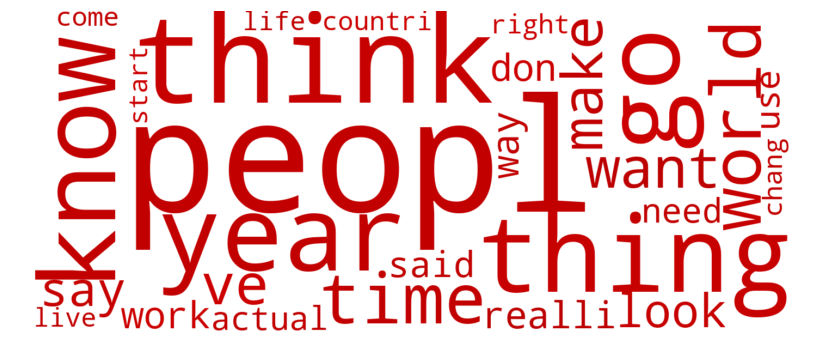

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
# Read the whole text.
text = top_words_df['word'].iloc[0:30].str.cat(sep=', ')

# Generate a word cloud image

wordcloud = WordCloud(width=1400, height=600, background_color='white').generate(text)

#change the value in return to set the single color need, in hsl format.
def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%%, %d%%)" % np.random.randint(37,41))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(14,6))
wordcloud.recolor(color_func = red_color_func)
plt.imshow(wordcloud, interpolation='bilinear')
#change the color setting
plt.axis("off")
plt.savefig('Most Informative Features - Persuasive')
plt.show()
